Import Libraries

In [157]:
# Core data manipulation and analysis libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations and arrays

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization

# Machine learning libraries
from sklearn import metrics  # For model evaluation metrics
from sklearn.model_selection import train_test_split  # For splitting datasets

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Enable inline plotting in Jupyter notebooks
# Fixed duplicate import and invalid syntax
%matplotlib inline


Read and Combine Raw Dataset given in 4 CSV Files and Features Name

In [158]:
    
# Reading datasets
# Using list comprehension to read all csv files in 4 csv files
dataframes = [pd.read_csv(f'C:/Users/raman/OneDrive/Important/1UnisaSTUDY/Courses/Capstone_Project_1/Dataset/Nour Moustafa/CSV Files/UNSW-NB15_{i}.csv', header=None) 
       for i in range(1,5)]
    
# Concat all to a single df name combined_data
# Resetting index is important because:
# 1. When concatenating dataframes, the original index values are preserved which can lead to duplicate indices
# 2. Duplicate indices can cause issues with data access, filtering and analysis
# 3. reset_index() creates a clean, sequential index starting from 0
combined_data = pd.concat(dataframes).reset_index(drop=True)  


In [159]:
# This csv file contains names of all the features
# ISO-8859-1 encoding is used to handle special characters and accents in the CSV file

feature_names_df = pd.read_csv('C:/Users/raman/OneDrive/Important/1UnisaSTUDY/Courses/Capstone_Project_1/Dataset/Nour Moustafa/CSV Files/NUSW-NB15_features.csv', encoding='ISO-8859-1')


In [160]:
# 'Name' is a column in the feature_names_df DataFrame that contains feature names being standardized
# The standardization process transforms these names by:
# 1. Converting to lowercase
# 2. Removing leading/trailing whitespace 
# 3. Removing spaces between words
# This ensures consistent naming convention across the dataset
feature_names_df['Name'] = feature_names_df['Name'].str.strip().str.lower().str.replace(' ', '')

# Display the transformed dataframe
feature_names_df

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [161]:
# Renaming the columns of our combined dataframe using the 'Name' column from feature_names_df
# This ensures our columns have meaningful names instead of default numeric indices
# The feature_names_df['Name'] contains the proper column labels for our dataset
combined_data.columns = feature_names_df['Name']

# Display the new column names to verify the renaming was successful
combined_data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

In [162]:
# Get the dimensions (rows, columns) of the combined_data DataFrame
combined_data.shape

(2540047, 49)

In [163]:
# Get basic statistical summary of numeric columns
combined_data.describe()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,...,1.191902e+06,1.110168e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,...,2.345856e-01,3.969940e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,...,7.940924e-01,1.996589e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [164]:
# Get information about DataFrame including data types and non-null values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [165]:
# Get basic info about object (string) columns
combined_data.describe(include=['object'])

Name,srcip,sport,dstip,dsport,proto,state,service,ct_ftp_cmd,attack_cat
count,2540047,2540047,2540047,2540047,2540047,2540047,2540047,2540047,321283
unique,43,100341,47,128297,135,16,13,13,13
top,59.166.0.4,1043,149.171.126.3,53,tcp,FIN,-,,Generic
freq,197959,216289,197771,619538,1495074,1478689,1246397,1429879,215481


In [166]:
# Display the first 5 rows of the combined_data DataFrame
combined_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [167]:
# Display the last few rows of the combined_data DataFrame
# This helps verify the data after merging/transformations
combined_data.tail()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0
2540046,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,...,,1,1,2,4,2,2,2,Exploits,1


In [168]:
# checking for null values
combined_data.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

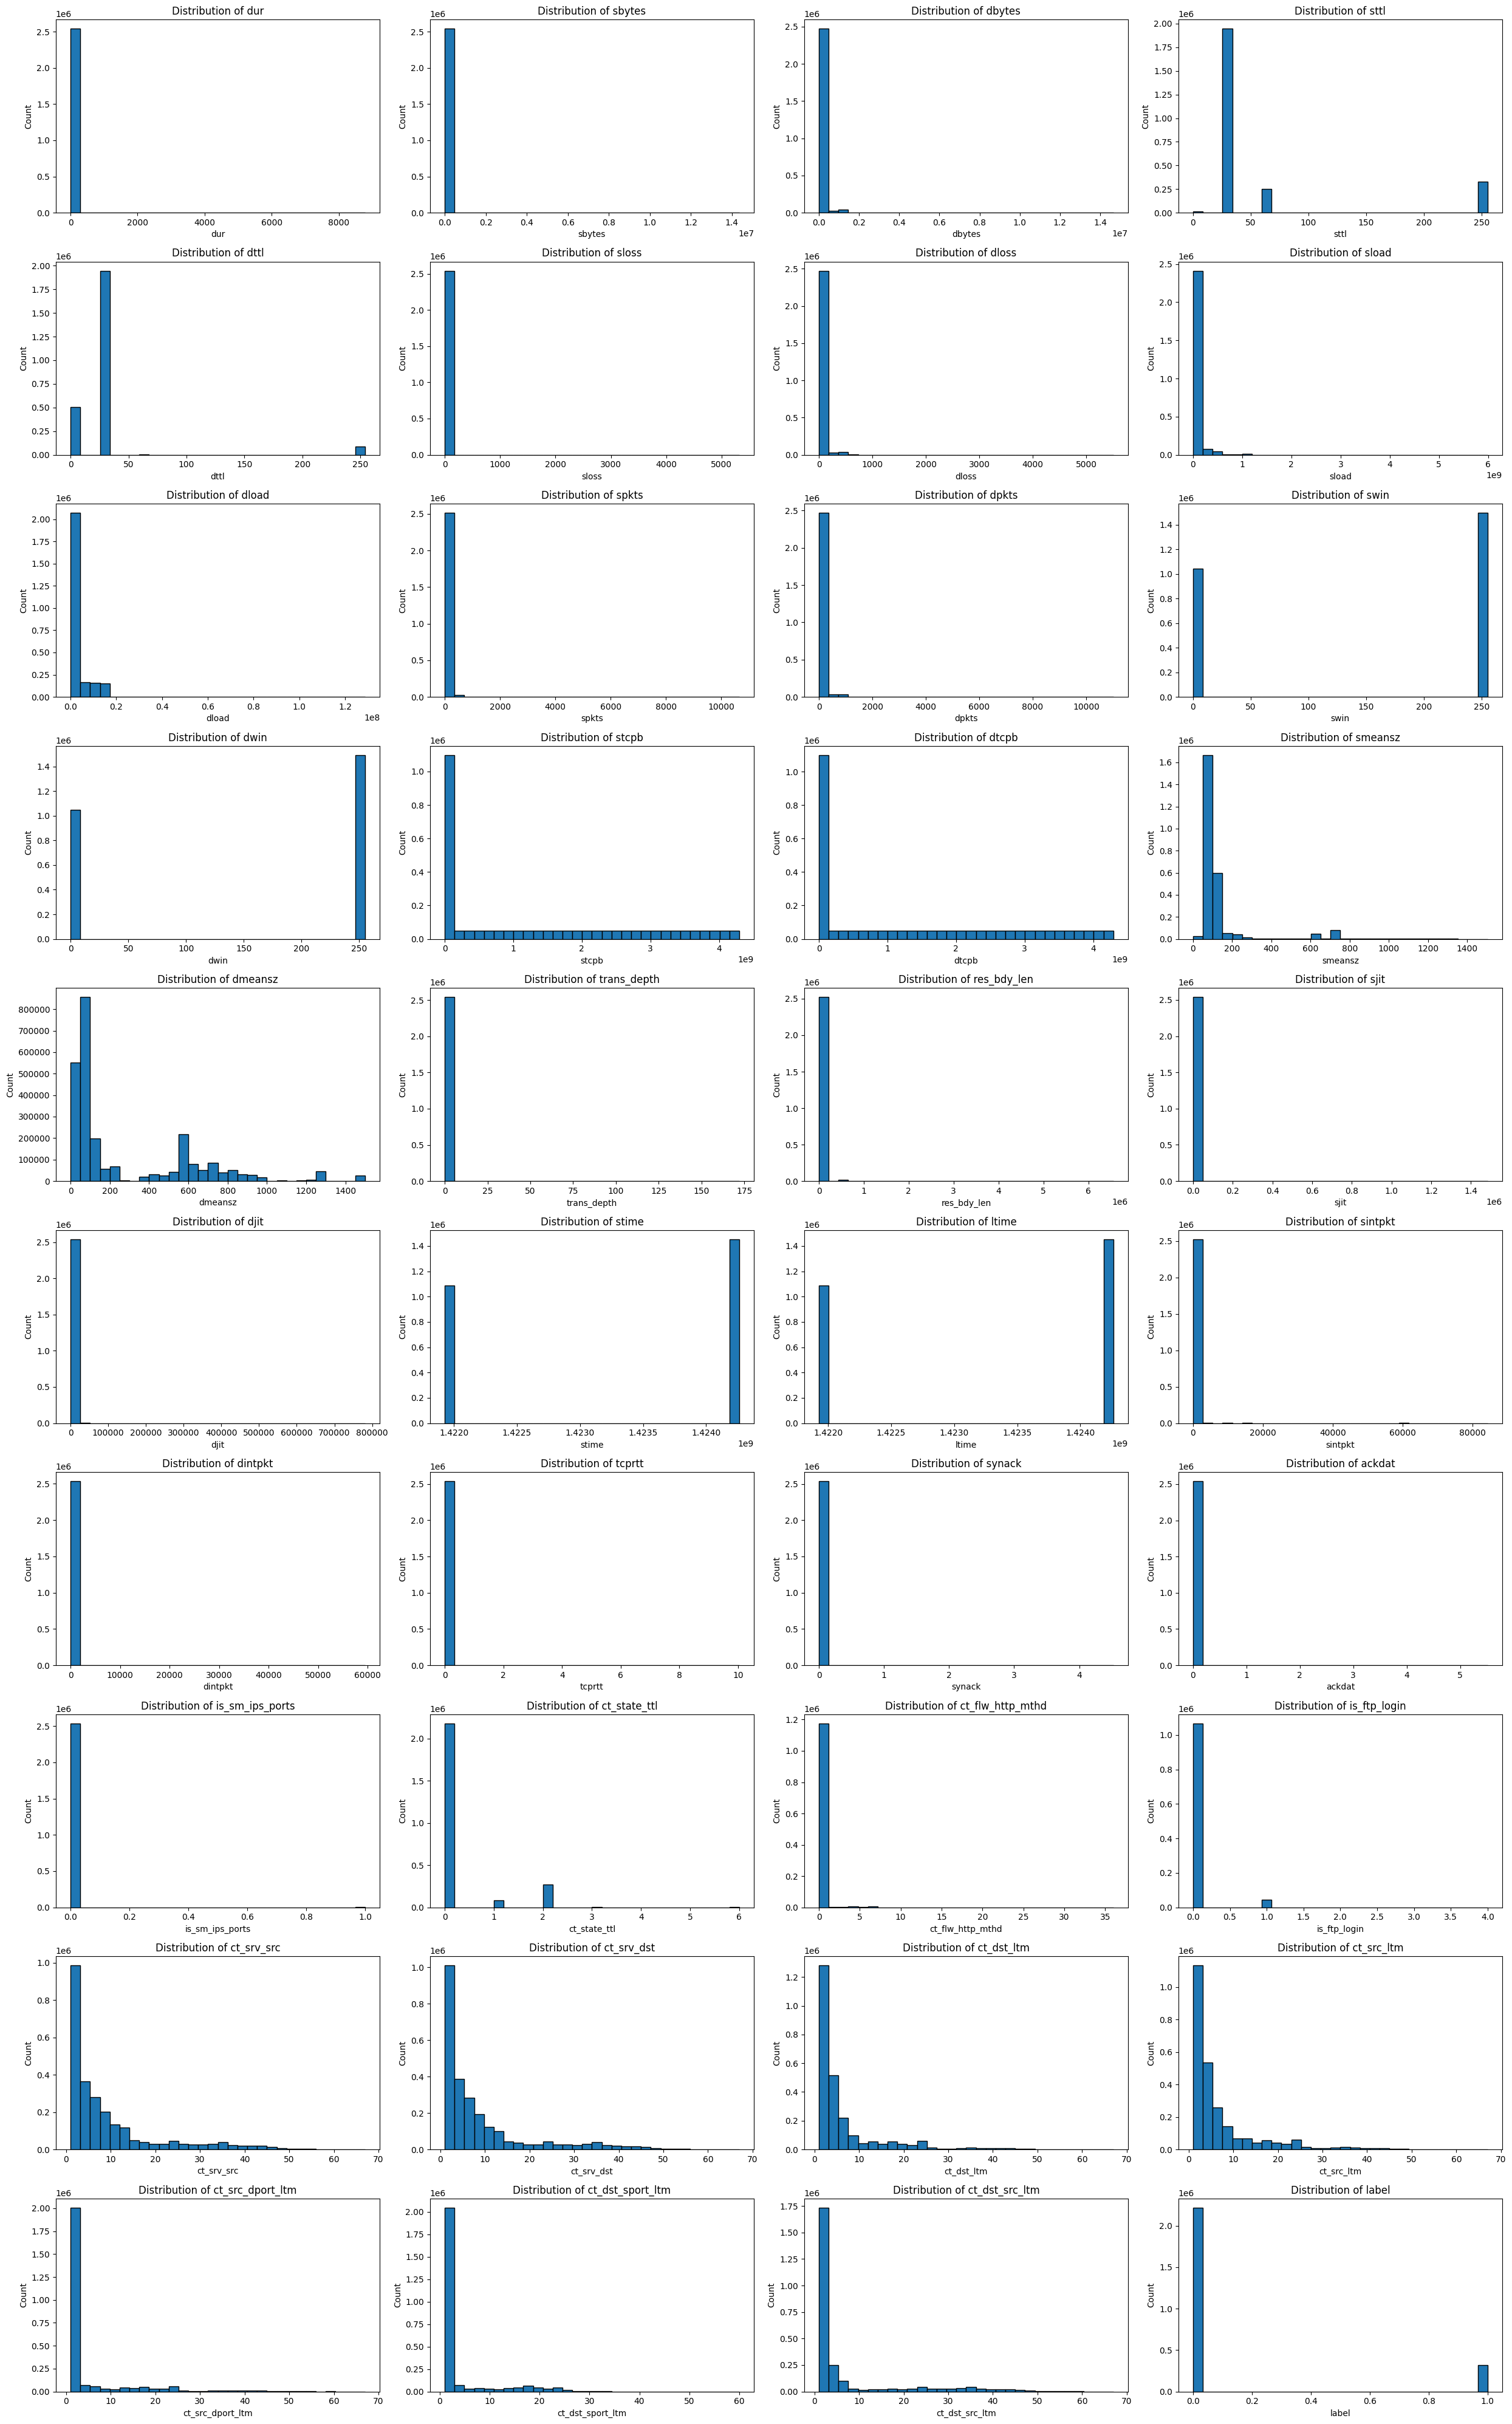

In [169]:
# Plot histograms for numeric columns with larger figure size and individual bar graphs
plt.figure(figsize=(25,40))
for i, col in enumerate(combined_data.select_dtypes(include=['float64','int64']).columns[:40], 1):
    plt.subplot(10, 4, i)
    plt.hist(combined_data[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()


In [170]:
# Export the combined_data DataFrame to CSV

# Note this data is big to see all data in excel file

# To load this data in uncomment the below line

#combined_data.to_csv('full_data.csv', index=False)